# Revenue Check

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 100)

In [2]:
data_path = "../../data/clean_data/clean_"

init_orders = pd.read_csv(f"{data_path}orders.csv")
init_orderlines = pd.read_csv(f"{data_path}orderlines.csv")
init_products = pd.read_csv(f"{data_path}products.csv")

In [3]:
init_orders.head()

,order_id,order_created_at,order_total,order_status
0,241423,2017-11-06 13:10:02,136.15,Completed
1,269440,2017-01-18 19:15:00,213.98,Completed
2,304328,2017-01-07 17:27:26,177.97,Completed
3,305628,2017-01-09 12:30:07,140.98,Completed
4,306550,2017-01-10 15:28:00,143.98,Completed


In [4]:
tot_rev_ol = (
init_orderlines
    .assign(ol_revenue = lambda x: x["ol_product_qty"] * x["ol_unit_price"])
    .agg(total_rev = ("ol_revenue", "sum"))
    .iloc[0,0]
)
tot_rev_ol

15638060.519999998

In [5]:
tot_rev_orders = (
init_orders
    .agg(total_rev = ("order_total", "sum"))
    .iloc[0,0]
)
tot_rev_orders

15861787.67

In [6]:
tot_rev_prods = (
init_products
    .agg(total_rev = ("product_price", "sum"))
    .iloc[0,0]
)
tot_rev_prods

6909996.69

In [42]:
diff_o_ol = (
init_orderlines
    .assign(ol_rev= lambda x: x["ol_product_qty"] * x["ol_unit_price"])
    .groupby("order_id")
    .agg(ol_order_total= ("ol_rev", "sum"))
    .merge(init_orders[["order_id","order_total"]], how="inner", on="order_id")
    .assign(
        o_ol_dif = lambda x: x["ol_order_total"] -  x["order_total"],
        o_ol_dif_percent = lambda x: x["o_ol_dif"] / x["order_total"] * 100
    )
    .sort_values("o_ol_dif_percent", ascending = False)
    .query("o_ol_dif > 0")
    
)
diff_o_ol["o_ol_dif"]

645      24.99
99       24.99
85      120.02
2021     21.01
8901     30.01
         ...  
27837     0.00
21356     0.00
17403     0.00
9366      0.00
8368      0.00
Name: o_ol_dif, Length: 918, dtype: float64

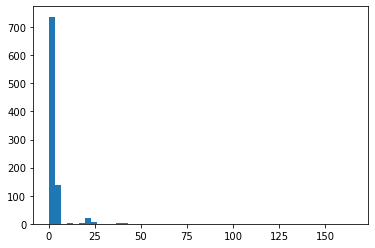

In [43]:
plt.hist(diff_o_ol["o_ol_dif"], bins=50)
plt.show()